In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv("restaurant_data.csv")
df.head()

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Restaurant 2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62
3,Restaurant 3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,404556.80
4,Restaurant 4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,1491046.35


In [3]:
df.columns

Index(['Name', 'Location', 'Cuisine', 'Rating', 'Seating Capacity',
       'Average Meal Price', 'Marketing Budget', 'Social Media Followers',
       'Chef Experience Years', 'Number of Reviews', 'Avg Review Length',
       'Ambience Score', 'Service Quality Score', 'Parking Availability',
       'Weekend Reservations', 'Weekday Reservations', 'Revenue'],
      dtype='object')

In [4]:
df.isnull().sum()

Name                      0
Location                  0
Cuisine                   0
Rating                    0
Seating Capacity          0
Average Meal Price        0
Marketing Budget          0
Social Media Followers    0
Chef Experience Years     0
Number of Reviews         0
Avg Review Length         0
Ambience Score            0
Service Quality Score     0
Parking Availability      0
Weekend Reservations      0
Weekday Reservations      0
Revenue                   0
dtype: int64

In [5]:
df.drop(columns = ["Name"], inplace = True)

In [6]:
df.describe()

,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,Revenue
count,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8.368000e+03
mean,4.008258,60.212835,47.896659,3218.254900,36190.621773,10.051984,523.010397,174.769974,5.521283,5.508772,29.491754,29.235301,6.560706e+05
std,0.581474,17.399488,14.336767,1824.896053,18630.153330,5.516606,277.215127,71.998060,2.575442,2.586552,20.025415,20.004277,2.674137e+05
min,3.000000,30.000000,25.000000,604.000000,5277.000000,1.000000,50.000000,50.011717,1.000000,1.000000,0.000000,0.000000,1.847085e+05
25%,3.500000,45.000000,35.490000,1889.000000,22592.500000,5.000000,277.000000,113.311102,3.300000,3.200000,13.000000,13.000000,4.546514e+05
50%,4.000000,60.000000,45.535000,2846.500000,32518.500000,10.000000,528.000000,173.910079,5.500000,5.600000,27.000000,26.000000,6.042421e+05
75%,4.500000,75.000000,60.300000,4008.500000,44566.250000,15.000000,764.250000,237.406885,7.800000,7.800000,43.000000,43.000000,8.130942e+05
max,5.000000,90.000000,76.000000,9978.000000,103777.000000,19.000000,999.000000,299.984924,10.000000,10.000000,88.000000,88.000000,1.531868e+06


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Location                8368 non-null   object 
 1   Cuisine                 8368 non-null   object 
 2   Rating                  8368 non-null   float64
 3   Seating Capacity        8368 non-null   int64  
 4   Average Meal Price      8368 non-null   float64
 5   Marketing Budget        8368 non-null   int64  
 6   Social Media Followers  8368 non-null   int64  
 7   Chef Experience Years   8368 non-null   int64  
 8   Number of Reviews       8368 non-null   int64  
 9   Avg Review Length       8368 non-null   float64
 10  Ambience Score          8368 non-null   float64
 11  Service Quality Score   8368 non-null   float64
 12  Parking Availability    8368 non-null   object 
 13  Weekend Reservations    8368 non-null   int64  
 14  Weekday Reservations    8368 non-null   

In [8]:
num_cols = df.select_dtypes(exclude = "object").columns.to_list()

In [9]:
num_cols = ['Rating','Seating Capacity','Average Meal Price','Marketing Budget','Social Media Followers','Chef Experience Years','Number of Reviews','Avg Review Length','Ambience Score','Service Quality Score','Weekend Reservations','Weekday Reservations']

In [10]:
len(num_cols)

12

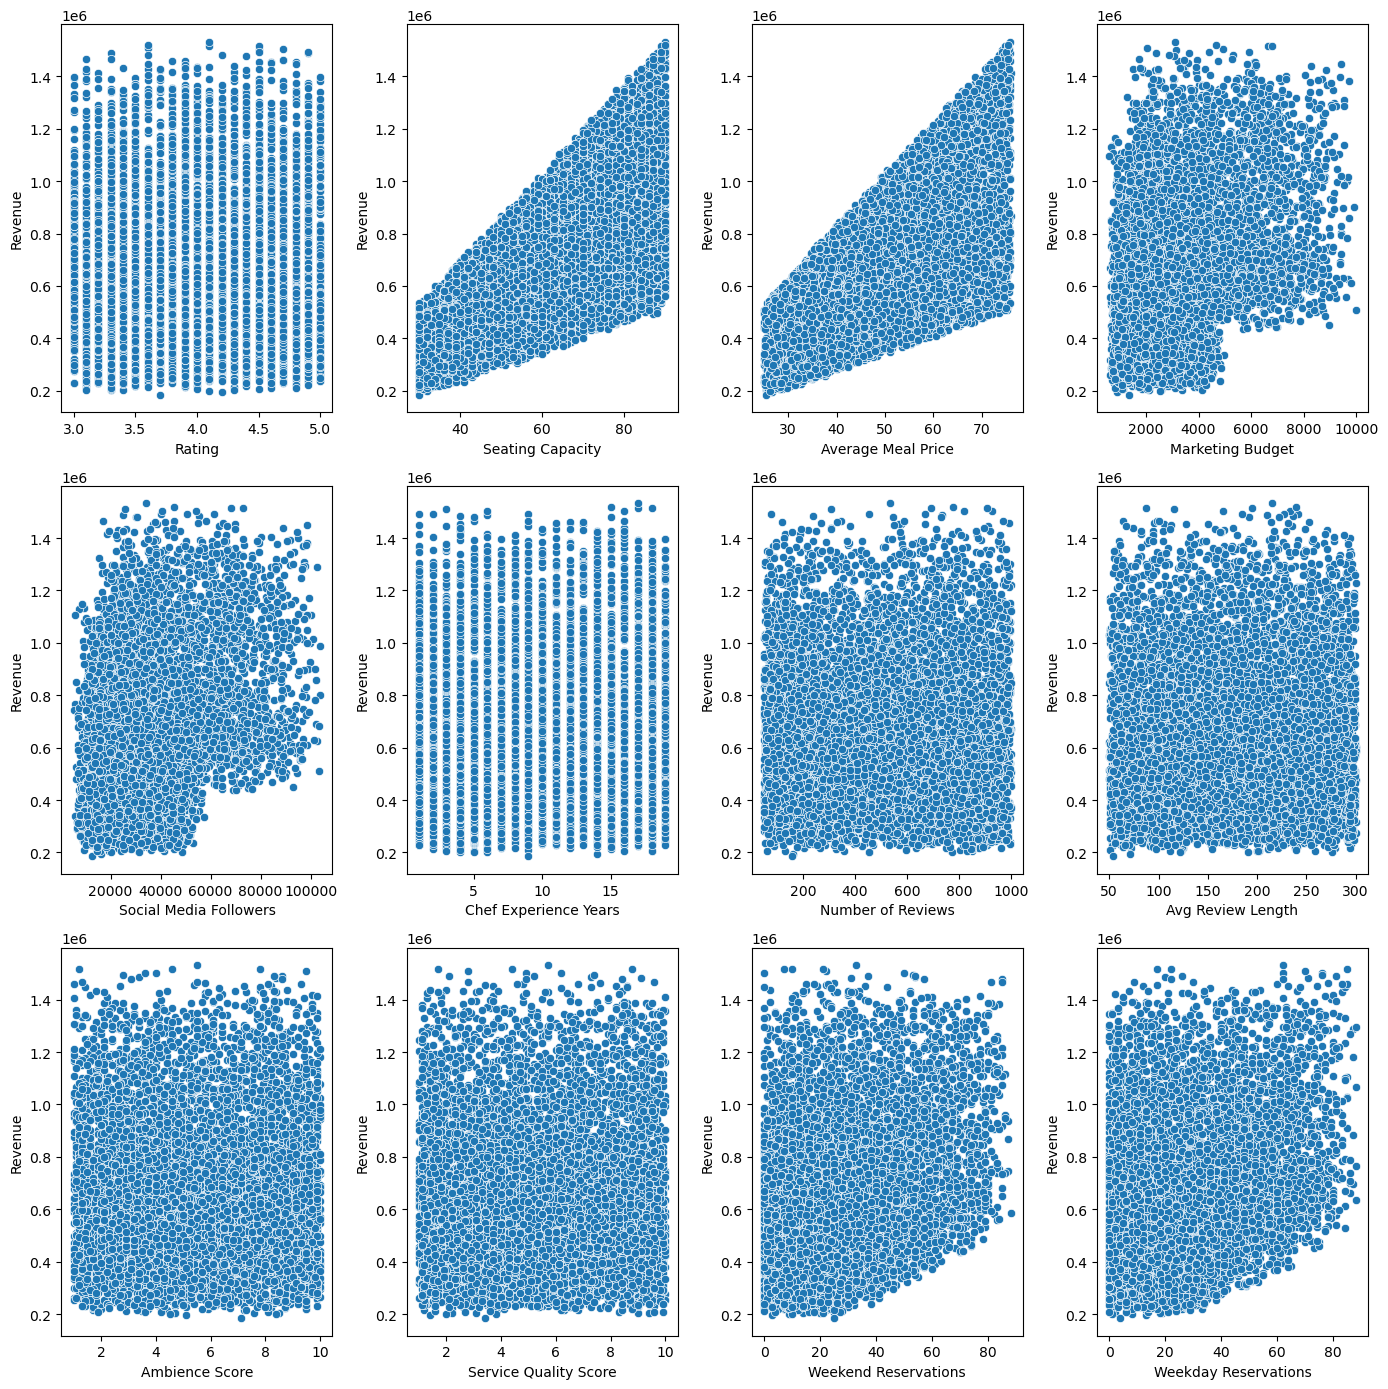

In [11]:
fig, axis = plt.subplots(nrows = 3, ncols = 4, figsize = (14, 14))
k = 0
for i in range(3):
    for j in range(4):
        sns.scatterplot(x = df[num_cols[k]], y = df["Revenue"], ax = axis[i][j])
        k = k + 1
plt.tight_layout()
plt.show()

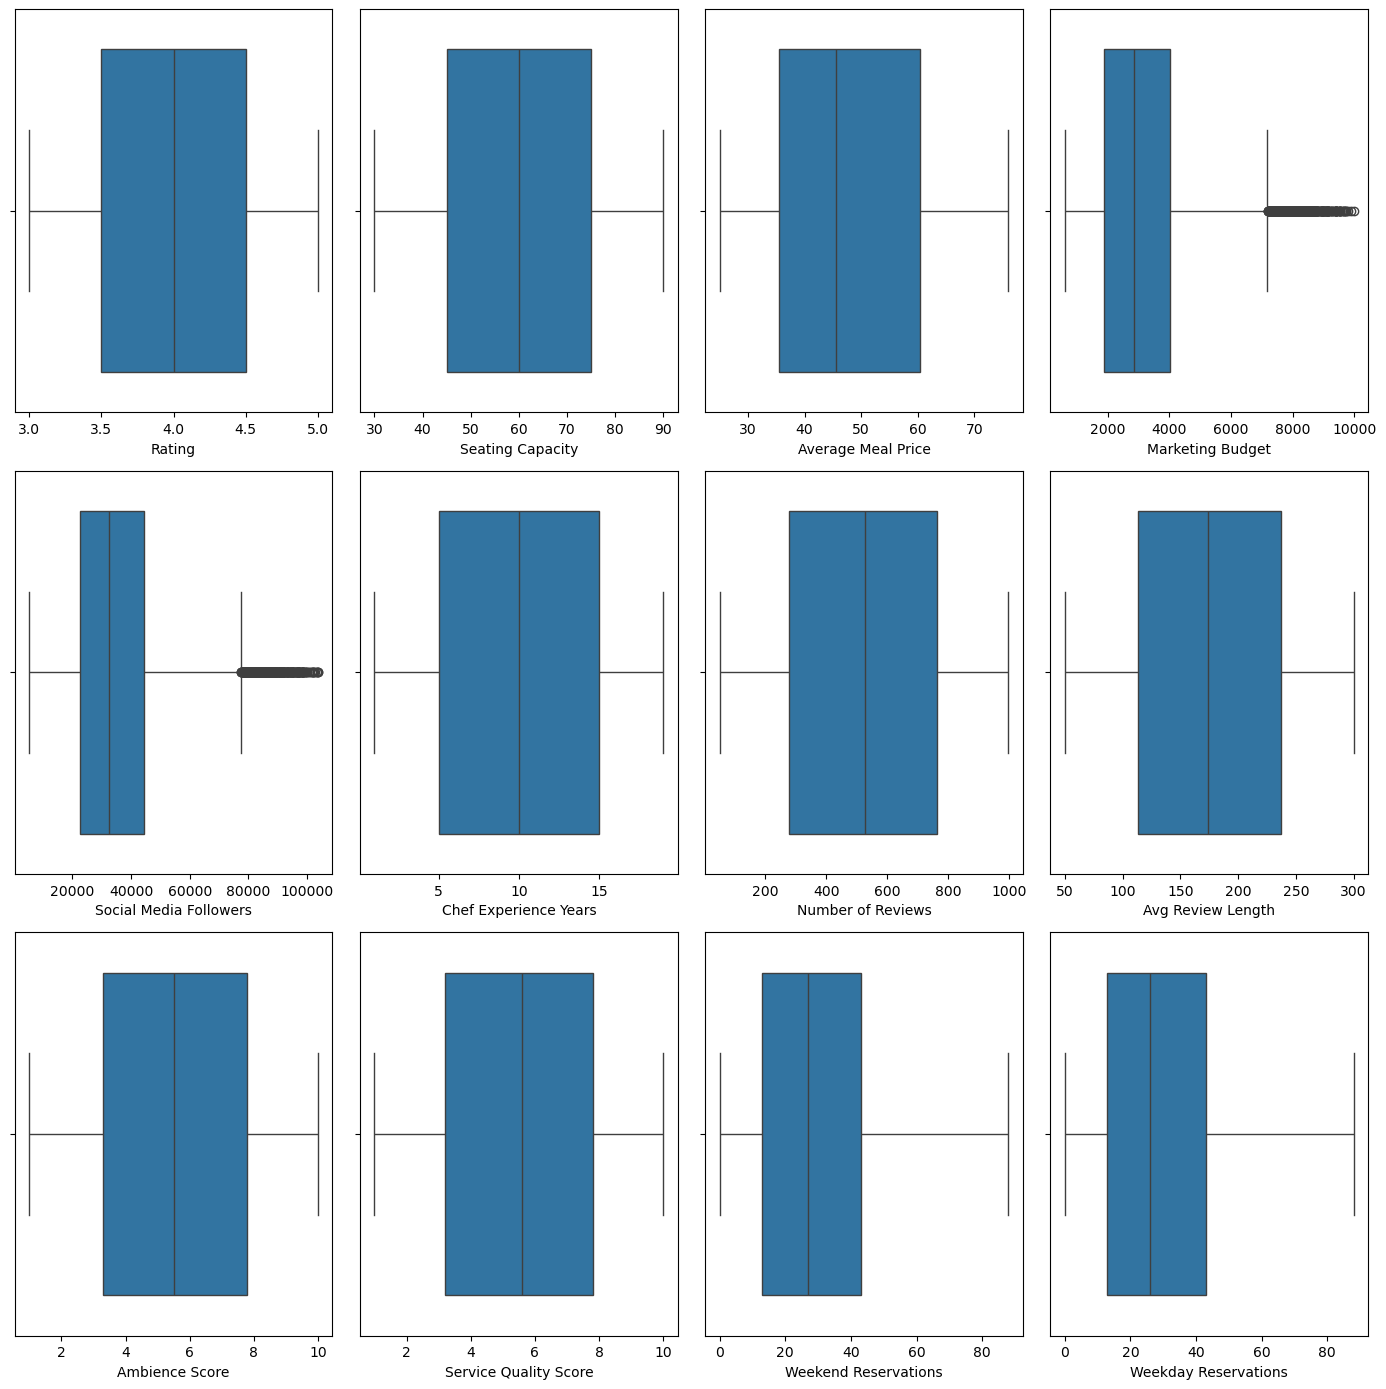

In [12]:
fig, axis = plt.subplots(nrows = 3, ncols = 4, figsize = (14, 14))
k = 0
for i in range(3):
    for j in range(4):
        sns.boxplot(x = df[num_cols[k]], ax = axis[i][j])
        k = k + 1
plt.tight_layout()
plt.show()

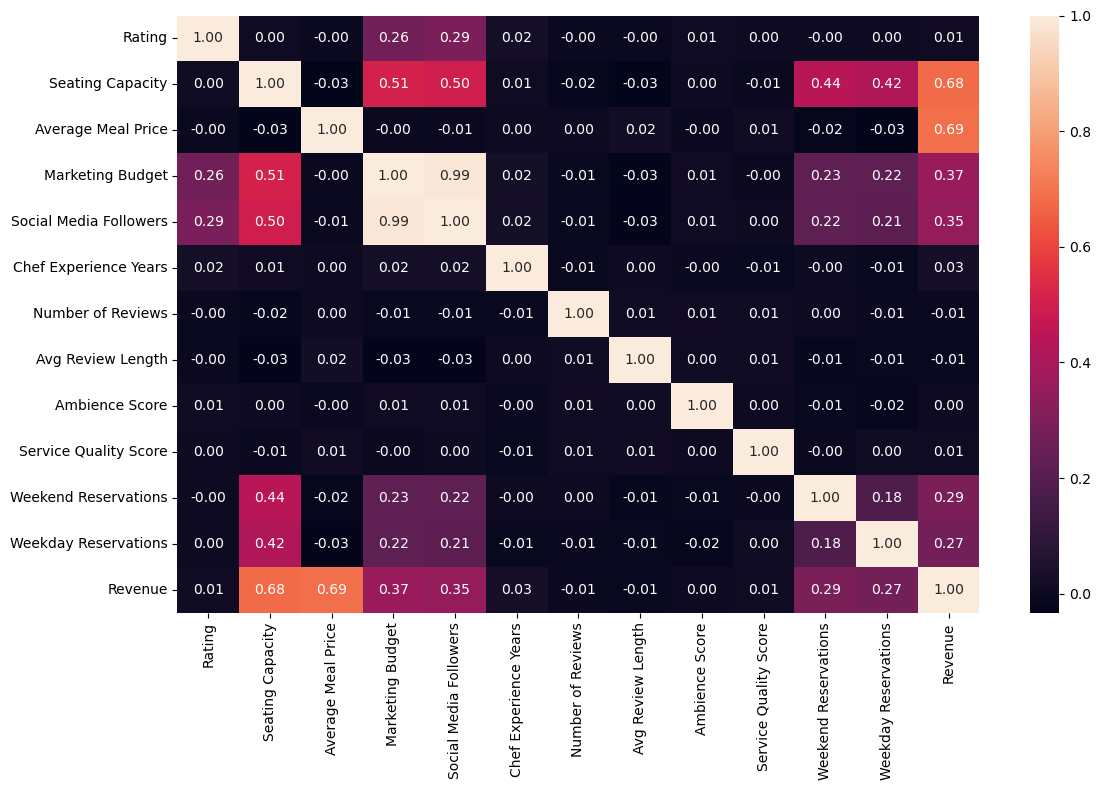

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols + ["Revenue"]].corr(), annot = True, fmt = ".2f")
plt.tight_layout()

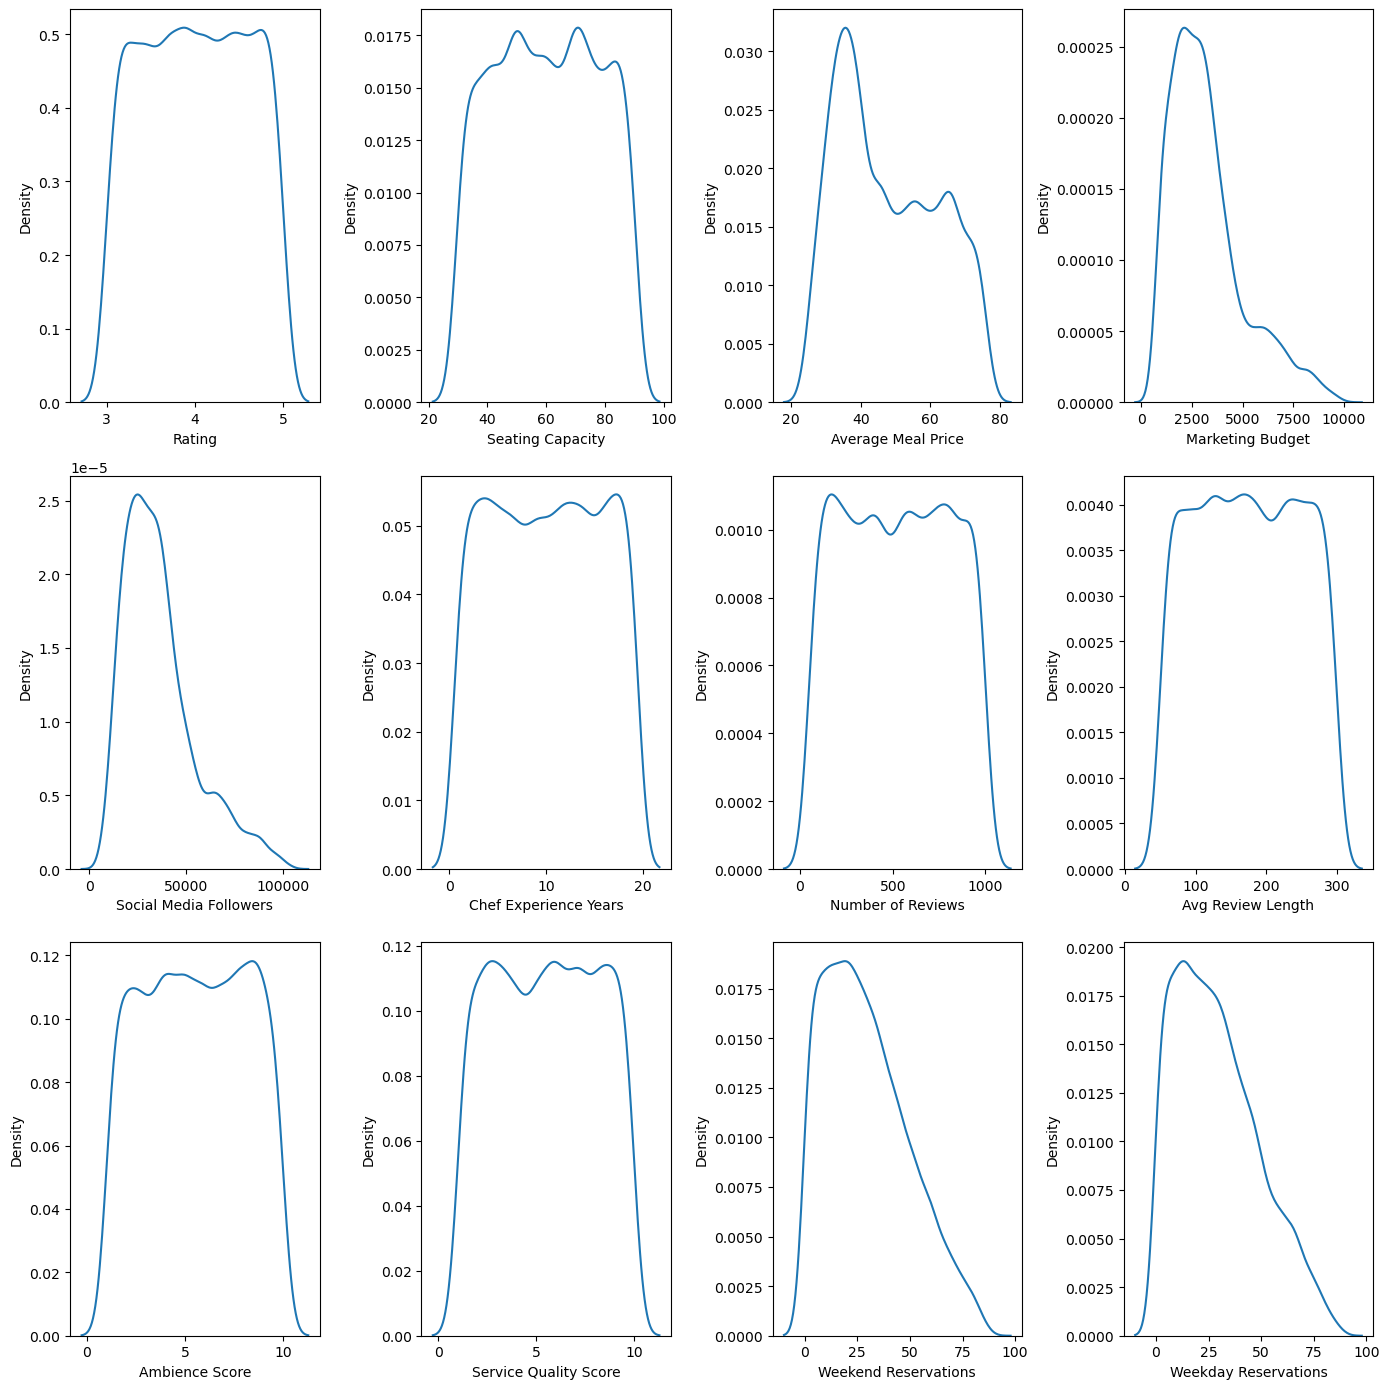

In [14]:
fig, axis = plt.subplots(nrows = 3, ncols = 4, figsize = (14, 14))
k = 0
for i in range(3):
    for j in range(4):
        sns.kdeplot(x = df[num_cols[k]], ax = axis[i][j])
        k = k + 1
plt.tight_layout()
plt.show()

In [15]:
df["Parking Availability"] = df["Parking Availability"].map({"Yes" : 1, "No" : 0})

In [16]:
df_dummies = pd.get_dummies(df, drop_first = True)
df_dummies

,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,...,Weekend Reservations,Weekday Reservations,Revenue,Location_Rural,Location_Suburban,Cuisine_French,Cuisine_Indian,Cuisine_Italian,Cuisine_Japanese,Cuisine_Mexican
0,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,...,13,4,638945.52,True,False,False,False,False,True,False
1,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,...,48,6,490207.83,False,False,False,False,False,False,True
2,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,...,27,14,541368.62,True,False,False,False,True,False,False
3,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,...,9,17,404556.80,True,False,False,False,True,False,False
4,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,...,37,26,1491046.35,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8363,3.4,54,34.85,1102,11298,11,380,253.919515,9.5,5.0,...,37,0,434653.45,False,True,False,True,False,False,False
8364,3.7,49,36.88,1988,20432,9,713,175.590195,2.7,2.6,...,37,21,414977.92,True,False,False,True,False,False,False
8365,4.7,88,46.87,5949,63945,6,436,222.953647,4.8,1.7,...,83,21,930395.87,False,False,False,False,True,False,False
8366,3.1,31,44.53,707,7170,1,729,178.482851,6.1,2.1,...,6,21,311493.48,True,False,False,False,False,False,False


In [17]:
df_dummies = df_dummies.astype("int")
df_dummies

,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,...,Weekend Reservations,Weekday Reservations,Revenue,Location_Rural,Location_Suburban,Cuisine_French,Cuisine_Indian,Cuisine_Italian,Cuisine_Japanese,Cuisine_Mexican
0,4,38,73,2224,23406,13,185,161,1,7,...,13,4,638945,1,0,0,0,0,1,0
1,3,76,28,4416,42741,8,533,148,2,3,...,48,6,490207,0,0,0,0,0,0,1
2,4,48,48,2796,37285,18,853,56,5,6,...,27,14,541368,1,0,0,0,1,0,0
3,4,34,51,1167,15214,13,82,205,4,2,...,9,17,404556,1,0,0,0,1,0,0
4,4,88,75,3639,40171,9,78,241,8,2,...,37,26,1491046,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8363,3,54,34,1102,11298,11,380,253,9,5,...,37,0,434653,0,1,0,1,0,0,0
8364,3,49,36,1988,20432,9,713,175,2,2,...,37,21,414977,1,0,0,1,0,0,0
8365,4,88,46,5949,63945,6,436,222,4,1,...,83,21,930395,0,0,0,0,1,0,0
8366,3,31,44,707,7170,1,729,178,6,2,...,6,21,311493,1,0,0,0,0,0,0


In [18]:
X = df_dummies.drop(columns = ["Revenue"])
y = df["Revenue"]

### Stacking Regressor

In [19]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [20]:
estimators = [
              ("lr", LinearRegression())
             ,("dtr", DecisionTreeRegressor())
             ,("svr", SVR())
             ]

In [21]:
from sklearn.ensemble import StackingRegressor

In [22]:
clf = StackingRegressor(
                estimators = estimators,
                final_estimator = RandomForestRegressor(),
                cv = 10
)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2, test_size = 0.2)

In [24]:
clf.fit(X_train, y_train)

StackingRegressor(cv=10,
                  estimators=[('lr', LinearRegression()),
                              ('dtr', DecisionTreeRegressor()),
                              ('svr', SVR())],
                  final_estimator=RandomForestRegressor())

In [25]:
from sklearn.metrics import r2_score

In [26]:
y_pred = clf.predict(X_test)

In [27]:
r2_score(y_test, y_pred)

0.9977523958935002

### Voting Regressor

In [28]:
from sklearn.ensemble import VotingRegressor

In [29]:
estimators = [
              ("lr", LinearRegression())
             ,("dtr", RandomForestRegressor())
             ,("svr", SVR())
             ]

In [30]:
vr = VotingRegressor(estimators = estimators, n_jobs = -1)

In [31]:
vr.fit(X_train, y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('dtr', RandomForestRegressor()), ('svr', SVR())],
                n_jobs=-1)

In [32]:
y_pred = vr.predict(X_test)

In [33]:
r2_score(y_test, y_pred)

0.8730605435956601

### XGBoost

In [34]:
import xgboost as xgb

In [35]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [36]:
params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',  # Use a regression-specific objective
    'eta': 0.1,
    'max_depth': 6,
    'eval_metric': 'rmse'  # Root Mean Squared Error for evaluation
}

In [37]:
num_rounds = 1000
watchlist = [(dtrain, 'train'), (dtest, 'eval')]
bst = xgb.train(params, dtrain, num_rounds, watchlist, early_stopping_rounds=10)

[0]	train-rmse:241484.27028	eval-rmse:241347.09796
[1]	train-rmse:218025.03999	eval-rmse:218128.26926
[2]	train-rmse:196881.31034	eval-rmse:197231.73800
[3]	train-rmse:177801.14057	eval-rmse:178287.50998
[4]	train-rmse:160569.73821	eval-rmse:161182.10848
[5]	train-rmse:145048.19862	eval-rmse:145755.24344
[6]	train-rmse:131043.69886	eval-rmse:131911.02171
[7]	train-rmse:118408.50657	eval-rmse:119260.71696
[8]	train-rmse:107006.49049	eval-rmse:107909.22108
[9]	train-rmse:96730.39247	eval-rmse:97571.30064
[10]	train-rmse:87461.40952	eval-rmse:88391.00344
[11]	train-rmse:79090.14009	eval-rmse:79935.24018
[12]	train-rmse:71548.88389	eval-rmse:72420.41384
[13]	train-rmse:64762.39486	eval-rmse:65644.85641
[14]	train-rmse:58619.12144	eval-rmse:59422.95783
[15]	train-rmse:53088.59602	eval-rmse:53839.83493
[16]	train-rmse:48117.00919	eval-rmse:48857.08910
[17]	train-rmse:43636.06467	eval-rmse:44431.79244
[18]	train-rmse:39602.30602	eval-rmse:40410.60029
[19]	train-rmse:35964.30746	eval-rmse:3676

E:\Anaconda\Lib\site-packages\xgboost\core.py:727: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[33]	train-rmse:11096.30154	eval-rmse:12101.69806
[34]	train-rmse:10407.20201	eval-rmse:11445.09237
[35]	train-rmse:9792.93938	eval-rmse:10847.27201
[36]	train-rmse:9252.48417	eval-rmse:10333.48602
[37]	train-rmse:8776.37403	eval-rmse:9872.76641
[38]	train-rmse:8348.69085	eval-rmse:9477.58658
[39]	train-rmse:7972.91032	eval-rmse:9126.71031
[40]	train-rmse:7640.03819	eval-rmse:8829.30959
[41]	train-rmse:7346.80899	eval-rmse:8559.01135
[42]	train-rmse:7086.36187	eval-rmse:8325.34222
[43]	train-rmse:6851.33620	eval-rmse:8108.72859
[44]	train-rmse:6644.01973	eval-rmse:7928.71633
[45]	train-rmse:6464.34933	eval-rmse:7771.94371
[46]	train-rmse:6299.15235	eval-rmse:7640.97177
[47]	train-rmse:6155.94265	eval-rmse:7520.82811
[48]	train-rmse:6029.62266	eval-rmse:7397.15150
[49]	train-rmse:5907.66964	eval-rmse:7296.34443
[50]	train-rmse:5799.30454	eval-rmse:7213.59158
[51]	train-rmse:5699.21870	eval-rmse:7142.28890
[52]	train-rmse:5605.80415	eval-rmse:7076.71860
[53]	train-rmse:5516.26772	eval-rm

In [38]:
# Make predictions
y_pred = bst.predict(dtest)

In [39]:
r2_score(y_test, y_pred)

0.999476286083607